### Importing all the required libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VISHNU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VISHNU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VISHNU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Importing the data from csv file

In [13]:
data1 = pd.read_csv("LabeledText.csv")
#data2 = pd.read_csv("twitter.csv")
#data3 = pd.read_csv("Twitter_Data.csv")

In [14]:
data1.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


In [15]:
#data2.head()

In [16]:
#data3.head()

### Removing irrelavent columns and checking if there are any rows will null values

In [17]:
data1 = data1.drop("File Name", axis = 1)
#data2 = data2.drop("id", axis = 1)

In [18]:
print(data1.isnull().sum().sum())
#print(data3.isnull().sum().sum())

0


In [19]:
#data3 = data3.dropna()
#print(data3.isnull().sum().sum())

### Changing the name of the columns to maping the label

In [20]:
data1.columns = ["tweet", "label"]
#data2.columns = ["label", "tweet"]
#data3.columns = ["tweet", "label"]

In [21]:
sentiment_mapping = {"negative": -1, "neutral": 0, "positive": 1}
data1["label"] = data1["label"].map(sentiment_mapping)

In [22]:
#data3["label"] = data3["label"].astype(int)

In [23]:
#data = pd.concat([data1, data3], ignore_index=True) 

In [24]:
data1.head()

,tweet,label
0,How I feel today #legday #jelly #aching #gym,-1
1,@ArrivaTW absolute disgrace two carriages from...,-1
2,This is my Valentine's from 1 of my nephews. I...,1
3,betterfeelingfilms: RT via Instagram: First da...,0
4,Zoe's first love #Rattled @JohnnyHarper15,1


### Plotting the label to understand the distribution

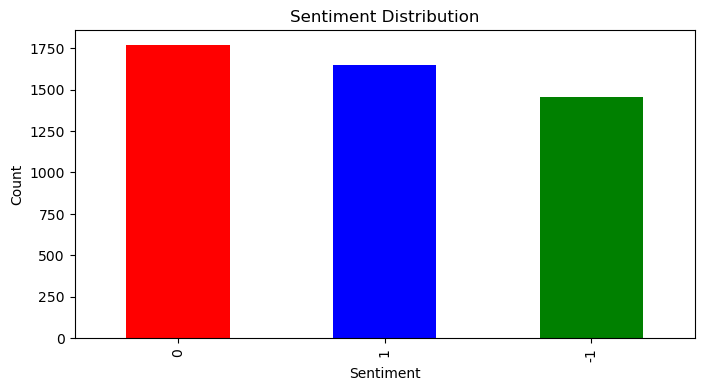

In [15]:
plt.figure(figsize=(8, ))  
data1["label"].value_counts().plot(kind="bar", color=["red", "blue", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

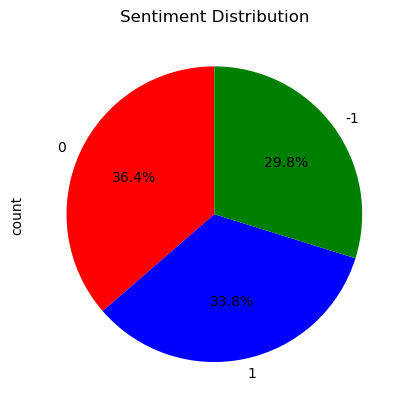

In [19]:
sentiment_counts = data1["label"].value_counts()
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=["red", "blue", "green"], startangle=90)
plt.title("Sentiment Distribution")
plt.show()

### Creating a function to remove characters that does not add value

In [14]:
def clean_text(text):
    if isinstance(text, str):  
        text = text.lower()  
        text = re.sub(r"http\S+|www\S+", "", text)  
        text = re.sub(r"@\w+", "", text)  
        text = re.sub(r"#\w+", "", text)  
        text = re.sub(r"[^a-zA-Z\s]", "", text)  
        text = re.sub(r"\s+", " ", text).strip()  
        
        words = word_tokenize(text)

        stop_words = set(stopwords.words("english"))
        words = [word for word in words if word not in stop_words]

        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return " ".join(words)
    return ""


### Applying the function to the tweets and extracting useful data

In [16]:
data1["cleaned_text"] = None

In [17]:
data1["cleaned_text"] = data1["tweet"].apply(clean_text)

In [18]:
data1.head(10)

,tweet,label,cleaned_text
0,How I feel today #legday #jelly #aching #gym,-1,feel today
1,@ArrivaTW absolute disgrace two carriages from...,-1,absolute disgrace two carriage bangor half way...
2,This is my Valentine's from 1 of my nephews. I...,1,valentine nephew elated sometimes little thing...
3,betterfeelingfilms: RT via Instagram: First da...,0,betterfeelingfilms rt via instagram first day ...
4,Zoe's first love #Rattled @JohnnyHarper15,1,zoes first love
5,Chaotic Love - giclee print ?65 at #art #love ...,1,chaotic love giclee print
6,They gna be mad when I reach that goal though....,-1,gna mad reach goal though wrong girl getting s...
7,On day 9.. It's now in my daily routine.. Feel...,-1,day daily routine feeling guuuuurdddd
8,#ANIMALABUSE #TORONTO #PUPPY #TORTURE WE OFFER...,0,offer k puppy
9,Mike will not accept this plastic rose. @wfaam...,-1,mike accept plastic rose


In [19]:
data1.shape

(4869, 3)

### Removing the tweet column and saving the dataframe into a csv file

In [21]:
data1 = data1.drop("tweet", axis = 1)

In [22]:
data1.shape

(4869, 2)

In [23]:
data1.to_csv("tweet_sentiment.csv", index = False)